In [6]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [234]:
size=200

X0 = np.random.multivariate_normal([0, -2], np.identity(2), size=size) 
X1 = np.random.multivariate_normal([0, 2], np.identity(2), size=size)
X = np.concatenate([X0, X1])
y = np.concatenate([np.zeros(size), np.ones(size)]).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = tf.keras.Sequential()
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', # work here
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1, verbose=2)

Epoch 1/10
300/300 - 0s - loss: 0.1584 - accuracy: 0.9800
Epoch 2/10
300/300 - 0s - loss: 0.1563 - accuracy: 0.9833
Epoch 3/10
300/300 - 0s - loss: 0.1546 - accuracy: 0.9833
Epoch 4/10
300/300 - 0s - loss: 0.1530 - accuracy: 0.9833
Epoch 5/10
300/300 - 0s - loss: 0.1515 - accuracy: 0.9833
Epoch 6/10
300/300 - 0s - loss: 0.1500 - accuracy: 0.9833
Epoch 7/10
300/300 - 0s - loss: 0.1486 - accuracy: 0.9833
Epoch 8/10
300/300 - 0s - loss: 0.1472 - accuracy: 0.9833
Epoch 9/10
300/300 - 0s - loss: 0.1457 - accuracy: 0.9833
Epoch 10/10
300/300 - 0s - loss: 0.1444 - accuracy: 0.9833


In [155]:
t = np.arange(-10, 10, 0.1)
U, V = np.meshgrid(t, t)
UV = np.array([U, V])

In [236]:
model = tf.keras.Sequential()
model.add(layers.Dense(2, input_dim=2, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10
300/300 - 0s - loss: 0.5901 - accuracy: 0.8167
Epoch 2/10
300/300 - 0s - loss: 0.5810 - accuracy: 0.9733
Epoch 3/10
300/300 - 0s - loss: 0.5736 - accuracy: 0.9733
Epoch 4/10
300/300 - 0s - loss: 0.5662 - accuracy: 0.9733
Epoch 5/10
300/300 - 0s - loss: 0.5593 - accuracy: 0.9733
Epoch 6/10
300/300 - 0s - loss: 0.5520 - accuracy: 0.9767
Epoch 7/10
300/300 - 0s - loss: 0.5445 - accuracy: 0.9767
Epoch 8/10
300/300 - 0s - loss: 0.5368 - accuracy: 0.9767
Epoch 9/10
300/300 - 0s - loss: 0.5291 - accuracy: 0.9733
Epoch 10/10
300/300 - 0s - loss: 0.5214 - accuracy: 0.9733


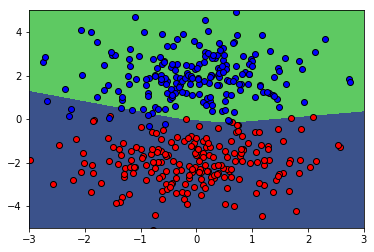

In [237]:
W = np.array([model.predict_proba(UV[:, i, :].T).reshape(-1) for i in range(len(U))])
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.contourf(t, t, W, levels=[0, 0.5, 1])
plt.plot(X0[:, 0], X0[:, 1], 'ro', markeredgecolor='k')
plt.plot(X1[:, 0], X1[:, 1], 'bo', markeredgecolor='k')

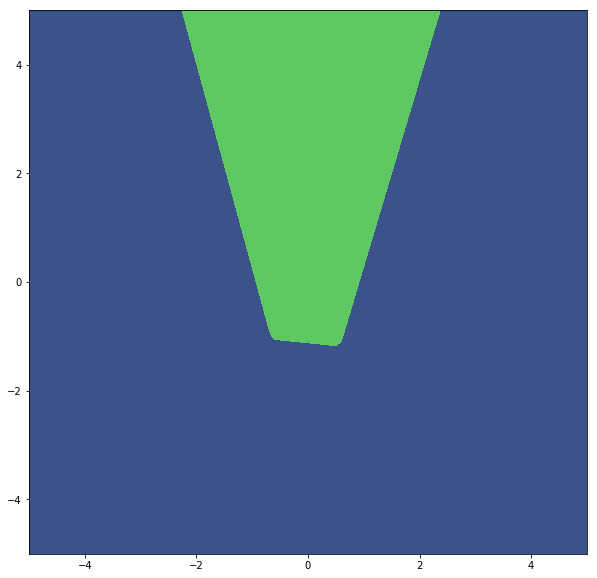

In [333]:
# size=1000

# X0 = np.random.multivariate_normal([0, -2.5], np.identity(2), size=size) 
# X1 = np.random.multivariate_normal([2.5, 1], np.identity(2), size=size)
# X2 = np.random.multivariate_normal([-2.5, 1], np.identity(2), size=size)
# X3 = np.random.multivariate_normal([0, 2], np.diag([0.5, 3]), size=3*size)
# X = np.concatenate([X0, X1, X2, X3])
# y = np.concatenate([np.zeros(size), np.zeros(size), np.zeros(size), np.ones(3*size)]).astype(int)


# model = tf.keras.Sequential()
# model.add(layers.Dense(2, input_dim=2, activation='relu'))
# model.add(layers.Dense(3, activation='relu'))
# model.add(layers.Dense(3, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# model.fit(X_train, y_train, epochs=50, verbose=0)

# W = np.array([model.predict_proba(UV[:, i, :].T).reshape(-1) for i in range(len(U))])
plt.figure(figsize=(10, 10))
plt.contourf(t, t, W, levels=[0, 0.5, 1])
# plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
# plt.plot(X[y == 1, 0], X[y == 1, 1], 'bo')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()